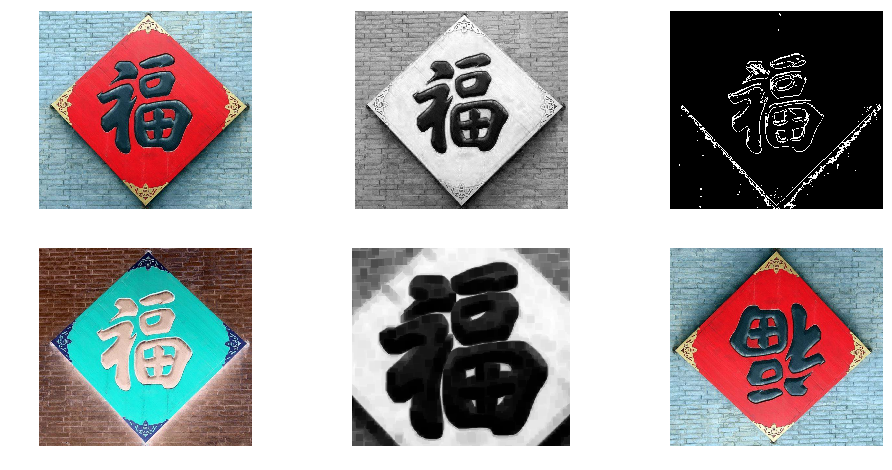

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# 设定图片显示大小和颜色映射表
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['image.cmap'] = 'gray'
# 读取图片
img = cv2.imread('img/fu.png')

# 转换颜色模式，显示原图
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.axis('off')

# 分离通道
r,g,b = cv2.split(img)
plt.subplot(2, 3, 2)
plt.imshow(r)
plt.axis('off')

# 轮廓提取
_, img_bin = cv2.threshold(r, 50, 255, cv2.THRESH_BINARY)
_, contours, _ = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_cont = np.zeros(img_bin.shape, np.uint8)    
cv2.drawContours(img_cont, contours,-1,255,3)
plt.subplot(2, 3, 3)
plt.imshow(img_cont)
plt.axis('off')

# 反色
img_i = np.asarray(img)
img_i = 255 - img_i
plt.subplot(2, 3, 4)
plt.imshow(img_i)
plt.axis('off')

# 图像腐蚀
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(25, 25))
eroded = cv2.erode(r, kernel)
size = img.shape
# 图像切割
eroded = eroded[int(size[1]*0.15):int(size[1]*0.7),int(size[0]*0.2):int(size[0]*0.85)]
plt.subplot(2, 3, 5)
plt.imshow(eroded)
plt.axis('off')

# 图像旋转
img_r = cv2.flip(img, -1)
plt.subplot(2, 3, 6)
plt.imshow(img_r)
plt.axis('off')

plt.show()